## Group 22 Project Proposal

## Introduction:

Everyone has at some point heard, either from a doctor or a person who has visited one, about the risk factors that lead to heart disease. Most professionals cite things like blood pressure, obesity, blood sugar level, diabetes, blood-cholesterol concentration and other chemical and physical factors that cause heart disease. With this in mind, we will be working with the UC Irvine Heart Disease dataset to answer our question: can we use the relevant data within to predict whether someone will be diagnosed with heart disease or not?


The dataset contains fourteen variables age, sex, chest pain type, resting blood pressure in mmHg (millimeters of mercury), cholesterol levels in mg/dl (milligrams per deciliter), whether the patient's fasting blood sugar is above 120 mg/dl, type of resting electrocardiographic results, patient's maximum heart rate (bpm), whether exercise induced chest pain in a patient, the ST depression induced by exercise, the slope of the ST segment at peak exercise, the amount of blood vessels analyzed for a patient, whether the patient has Thalassemia (blood disorder) and finally the heart disease diagnosis.



## Preliminary exploratory data analysis:

**Reading the dataset in from the web**

In [1]:
#Dataset reading

#ESSENTIAL LIBRARIES
library(tidyverse)

col_names <-c("age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol_concentration", "fasting_blood_sugar_greater",
              "resting_electro", "max_bpm", "induced_pain", "ST_depression","slope_of_st_seg", "amount_of_vessels_checked", "thalassemia", "diagnosis")

# append two dataframes to make an approproately sized dataset (cleveland and hungary together)
heart_disease_data <- read_csv("https://github.com/dislasriv/DSCI-100-Group-22-Project/raw/main/dataset/processed.cleveland.data", col_names = c(col_names)) |>
                      mutate(across(age:diagnosis, as.numeric)) |>
                      bind_rows(mutate(read_csv("https://github.com/dislasriv/DSCI-100-Group-22-Project/raw/main/dataset/processed.hungarian.data", col_names = c(col_names)),
                                across(age:diagnosis, as.numeric)))

#print
heart_disease_data

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): amount_of_vessels_checked, thalassemia
dbl (12): age, sex, chest_pain_type, resting_blood_pressure, cholesterol_con...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 2 warnings in `mutate()`.
The first warning w

age,sex,chest_pain_type,resting_blood_pressure,cholesterol_concentration,fasting_blood_sugar_greater,resting_electro,max_bpm,induced_pain,ST_depression,slope_of_st_seg,amount_of_vessels_checked,thalassemia,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 15
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 23 rows containing missing values (`geom_point()`).”
Warning message in geom_bar(aes(stat = "count", colour = diagnosis)):
“Ignoring unknown aesthetics: stat”


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 15
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing stat.
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_count()` must only have an x or y aesthetic.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(r

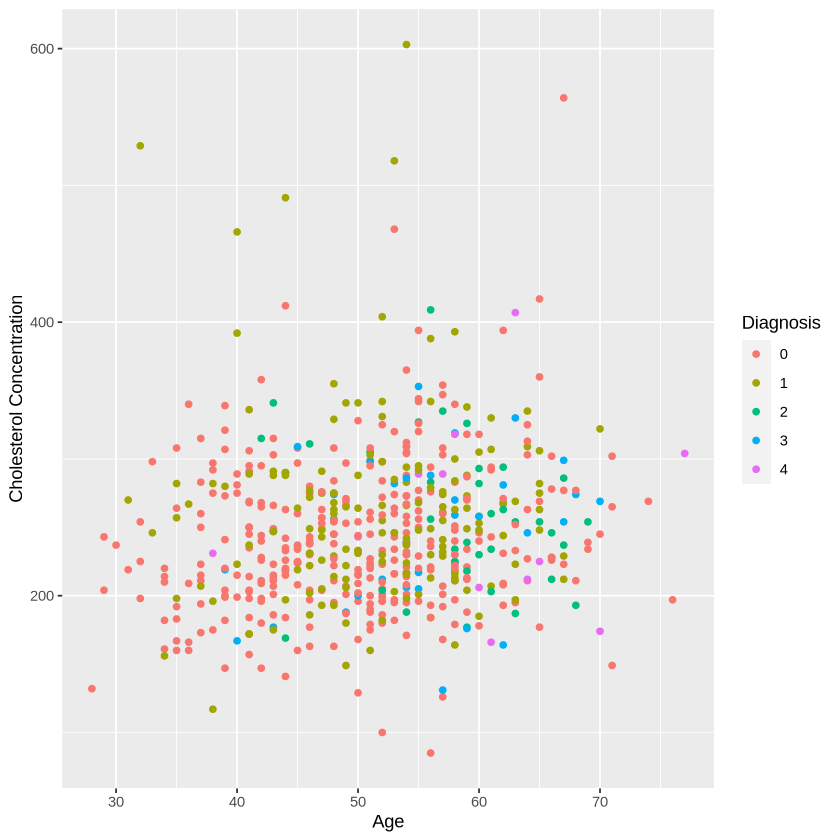

In [2]:
heart_disease_data <- heart_disease_data |>
        mutate(diagnosis = as_factor(diagnosis))

heart_disease_plot <- ggplot(data=heart_disease_data, aes(x=age, y=cholesterol_concentration))+
geom_point(aes(colour = diagnosis))+
labs(x = "Age", y = "Cholesterol Concentration", colour = "Diagnosis")
theme(text = element_text(size = 15))
heart_disease_plot

heart_disease_bar <- ggplot(data=heart_disease_data, aes(x=sex, y=resting_blood_pressure))+
geom_bar(aes(stat = "count", colour = diagnosis))+
labs(x = "Sex", y = "Resting Blood Pressure", colour = "Diagnosis")
theme(text = element_text(size = 15))
heart_disease_bar

## Methods:
(use cholesterol levels, resting blood pressure and any other variables that seem relevant, maybe 1 or two more)

## Expected outcomes and significance:

We expect that observations with higher values for our predictors are more likely to be classified as having heart disease, as is the societal notion.


The result of this data analysis could have several impacts. Say a correlation is found between our predictors and heart disease, in the real world, these results would likely not sitr up the pot too much. However, our visualizations and trends may possibly yield new data that can change how society approaches the fight against heart disease. Governments may change how they address heart disease publicly to account for our results, health organizations may start new campaigns to educate the public about our results, and new preventative measures may be developed as a result of our findings. If no correlation is found, this may challenge previously held societal notions of what causes heart disease. In the real world, this could revolutionize heart disease treatment and research, debunk a societal myth, and potentially cause the scientific community to come together and rediscuss heart disease as a whole.


One question that could arise from these findings is whether there are any other factors apart from our predictors that contribute to an increased risk of developing heart disease.


---------------------------------------------------------------------------------------------------------------------------------

# Group 22 Project Proposal

(Revised Version) Jorge Martinez, Faraaz Jan, Diego Islas, Jocelyn Chan 

## Introduction:

Everyone has at some point heard, either from a doctor or a person who has visited one, about the risk factors that lead to heart disease. Most professionals cite things like blood pressure, obesity, blood sugar level, diabetes, blood-cholesterol, maximum heart rate, and other chemical and physical factors that cause heart disease. With this in mind, we will be using the cholesterol (chol), maximum heart beat (thalach) and age components within the the UC Irvine Heart Disease dataset to answer our predictive question.

**Predictive question: Is there a relationship between age, cholesterol levels, maximum heart rate, and the diagnois of heart disease.**

The data was found through the online platform of Kaggle (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download) and will be used for our analysis.

We will be conducting a KNN Classification in order to answer the predictive question.

In [12]:
library(tidyverse)
library(tidymodels)
library(dplyr)
library(purrr)
options(repr.matrix.maxrows = 10)

## Reading the Data

The dataset contains fourteen variables (listed in order seen in colunms):

1.) age

2.) sex

3.) chest pain type (cp)

4.)resting blood pressure in millimeters of mercury(trestbps)

5.)cholesterol levels in milligrams per deciliter (chol)

6.)whether the patient's fasting blood sugar is above 120 mg/dl (fbs)

7.)type of resting electrocardiographic results (restecg)

8.)patient's maximum heart rate in bpm (thalach)

9.)whether exercise induced chest pain in a patient (exang)

10.)the ST depression induced by exercise (oldpeak) 

11.)the slope of the ST segment at peak exercise (slope)

12.)the amount of blood vessels analyzed for a patient (ca) 

14.)whether the patient has Thalassemia (thal) 

15.) and finally the heart disease diagnosis (target)

Using the read function, we read the raw data uploaded

In [13]:
heart_disease_data <- read_csv("https://raw.githubusercontent.com/dislasriv/DSCI-100-Group-22-Project/main/heart.csv")
heart_disease_data

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


## Selecting Data
To perform our analysis, we will use the select() function to choose the columns for age, cholesterol (chol), maximum heart rate (thalach), and the target (diagnosis) from the dataset and put them in a table format. Further, the mutate() function will be used to convert the target variable from categorical data into a factor type. This conversion enables the target variable to have two levels: 'Y', indicating that the individual is diagnosed with heart disease, and 'N', signifying no diagnosis of heart disease.

In [14]:
heart_disease_selected <- select(heart_disease_data, age, chol, thalach, target)|>
                          mutate(target=as_factor(target))|>
                          mutate(heart_disease=fct_recode(target, "Y" = "1", "N" = "0"))
                          
heart_disease_selected

age,chol,thalach,target,heart_disease
<dbl>,<dbl>,<dbl>,<fct>,<fct>
52,212,168,0,N
53,203,155,0,N
70,174,125,0,N
61,203,161,0,N
62,294,106,0,N
58,248,122,1,Y
58,318,140,0,N
55,289,145,0,N
46,249,144,0,N


## Preliminary Exploratory Data Analysis:

**NA Values**
Using the sum() function with the is.na() function, we can add up all of the NA values present within our dataset. This is done in order to determine wether the data as useable, as too many NA values would make it problematic to preform an analyis.  

In [6]:
sum(is.na(heart_disease_selected))

[1] 0

Since there aren't any NA varibales present in the dataset we chose, it is suitable to use these variables as our research analysis.

**Summary Table**

In our summary table, we will statistically summarize each variable, using the minimum, median, maximum values, and the standard deviation. The summarise() and across() functions will be utilized to apply multiple functions throughout multiple colunms. The ~mean(.x, na.rm = TRUE) function is used to apply a function to a colunm, where x is the data within that colunm. Further na.rm=TRUE is utilized to consider the NA values in the data. The pivot_longer() function is used to transform the data from wide format to long format. Lastly the ."value" will tells pivot_longer to spread the values  back into separate columns, while Variable gets the names of the variables.

In [15]:
summary_table <- heart_disease_selected %>%
  summarise(across(c(age, chol, thalach), list(
    Mean = ~mean(.x, na.rm = TRUE),
    Median = ~median(.x, na.rm = TRUE),
    SD = ~sd(.x, na.rm = TRUE),
    Min = ~min(.x, na.rm = TRUE),
    Max = ~max(.x, na.rm = TRUE)
  ))) %>%
  pivot_longer(cols = everything(), names_to = c(".value", "Variable"), names_sep = "_")

print(summary_table)

# A tibble: 5 × 4
  Variable   age  chol thalach
  <chr>    <dbl> <dbl>   <dbl>
1 Mean     54.4  246     149. 
2 Median   56    240     152  
3 SD        9.07  51.6    23.0
4 Min      29    126      71  
5 Max      77    564     202  


**Summary Table Analysis**

The mean age is 54.4 years, with the youngest and oldest participants being 29 and 77 years old, respectively. Cholesterol levels have a mean of 246 mg/dl, with the average cholesterol level worldwide being 178 mg/dl.The mean maximum heart rate recorded is approximately 149 beats per minute, with a relatively wide spread of data indicated by a standard deviation of 23.0, suggesting variability in the heart rate responses among types of individuals. Further Cholesterol values range significantly from 126 to 564 mg/dl.The standard deviation for cholesterol is notably high at 51.6 mg/dl, highlighting a broad range in the cholesterol levels of the study participants.

## Visualization 

**Age vs Cholesterol** 

To vizualize the relationship between Age and Cholesterol (chol), a table will be made using the select() function to select both colunms.

In [20]:
hd_select_chol <- select(heart_disease_selected,age,chol,heart_disease)
hd_select_chol

age,chol,heart_disease
<dbl>,<dbl>,<fct>
52,212,N
53,203,N
70,174,N
61,203,N
62,294,N
58,248,Y
58,318,N
55,289,N
46,249,N


For the vizualization, we will make a graph that shows if there's a link between age, cholesterol levels, and heart disease. By plotting dots for each participant, where we can see their age (on the x-axis) and cholesterol (on the y-axis). Through this we will look for patterns. Further we will make the dots a bit tranclucent using aplha=0.5, so if they pile up, we can still see where there is a large concentration of them. Our theory is that since the older people are, cholesterol levels tend to be higher,  mightbe a larger possability for heart disease.

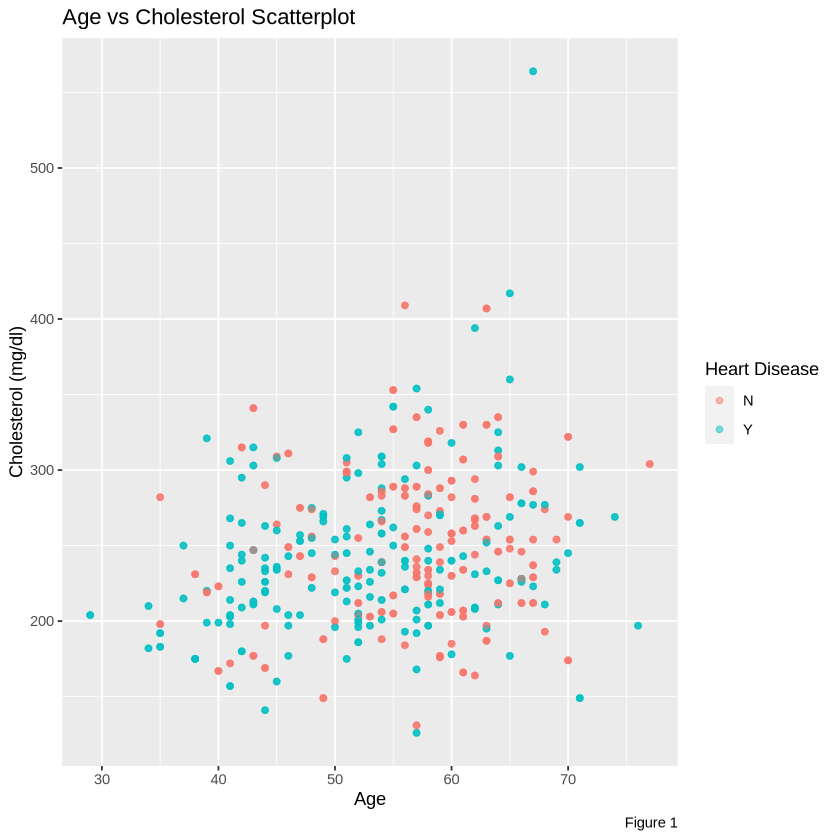

In [21]:
hd_chol_plot <- ggplot(hd_select_chol,aes(x = age, y = chol, colour = heart_disease)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Age", y = "Cholesterol (mg/dl)", colour = "Heart Disease", caption = "Figure 1") +       
                    ggtitle("Age vs Cholesterol Scatterplot")
hd_chol_plot

**Analysis**

Based on the scatter plot provided, our analysis shows an unexpected outcome. While our theory was that that age would correlate with higher cholesterol levels and an thus increase the number of heart disease, the visual data does not support this hypothesis. The distribution of points on the plot shows a scattering of cholesterol levels across various ages with no clear upward trend. Further, we notice a cluster of red dots, indicating patients without heart disease, more prevalent among older individuals. This observation suggests that a higher age does not necessarily correspond to a greater number of heart disease cases within this dataset. Moreover, the overlap of points, made clear by the use of a 0.5 alpha value, does not show a denser region that would indicate a strong correlation between the two variables. Therefore, while our initial hypothesis did not support a direct relationship between age, cholesterol levels, and heart disease presence, the actual data reveals that furtehr analysis is required. 

**Age vs Max Heart Rate**

We will then make a vizaulizationthat shows if there's a link between a person's age and their maximum heart rate. The select() function is used to select boths colunms. Through this we can see if these variables are related to whether they have heart disease or not.

In [10]:
hd_select_thalach <- select(heart_disease_selected,age,thalach,heart_disease)|>
                  mutate(heart_disease)
hd_select_thalach

age,thalach,heart_disease
<dbl>,<dbl>,<fct>
52,168,N
53,155,N
70,125,N
61,161,N
62,106,N
58,122,Y
58,140,N
55,145,N
46,144,N


We're also going to create a plot to see if there's a correlation between how old someone is and maximum heart rate, and if these factors influence the likelihood of having heart disease. From our theory, older people usually have lower heart rates which might lead to more cases of heart disease.

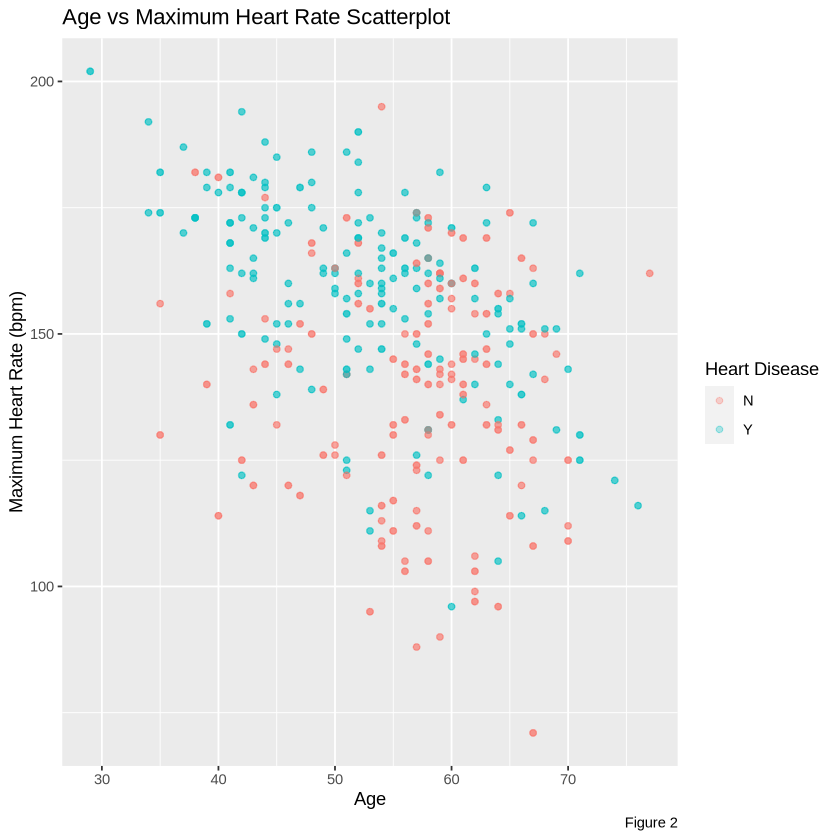

In [11]:
hd_thalach_plot <- ggplot(hd_select_thalach,aes(x = age, y = thalach, colour = heart_disease)) +
                       geom_point(alpha = 0.3)+
                       labs(x = "Age", y= "Maximum Heart Rate (bpm)", colour = "Heart Disease", caption = "Figure 2") +       
                       ggtitle("Age vs Maximum Heart Rate Scatterplot")
hd_thalach_plot

**Analysis**

From our scatter plot, it seems like there's hardly any link between how old someone is, their maximum heart rate, and whether they have heart disease. The chart helped us see that maximum heart rate may not be a good way to guess if someone has heart disease.

## KNN Classification

**Methods**

To figure out if someone has heart disease or not, we're going to use the K-Nearest Neighbors method. We'll look at things like cholesterol levels, maximum heart rate, and age as our predictors to make our prediction. The result will tell us if a person has no heart disease (0) or has a heart disease (1). We're using these three aspects to predict heart disease because we believe it's multiple things can impact an individual having a heart diseae. We will further make use  of a  facet_grid function to make a bunch of smaller charts arranged in a grid to show our data.

**Expected Outcomes and Significance**

5-6 semtemces